# Previsão da necessidade de cuidados intensivos

## Contexto

## Escopo

# Importação dos pacotes

In [56]:
import pandas as pd
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *
import warnings
import os

In [22]:
warnings.filterwarnings('ignore')

# Importações das funções locais

In [3]:
os.chdir("../funcoes")
from feature import high_corr_drop, drop_equal_var_mean, chi2_drop
from my_classifier import Classifier
from my_plot import labs, central_trend
os.chdir("../notebooks")

# Leitura dos dados pré-processados

In [4]:
df = pd.read_csv('../dados/dados_preprocessados/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

In [5]:
sns.set_style('darkgrid')

In [6]:
df.head()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,UNDER_30,30th_40th,50th_70th,ABOVE_80
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.868365,-0.868365,-1.0,-0.742004,-0.742004,-0.742004,-0.

# Validação Cruzada

A validação cruzada é um método estatístico usado para estimar a habilidade dos modelos de aprendizado de máquina, portanto a fim de tentar resumir a performance de um modelo de Machine Learning e, escolher o melhor modelo para o problema em questão. Essa técnica consiste em realizar divisões dentro do dataset inteiro entre dados de treino e teste de forma const 

![CV](../img/dataml_cross_validation.png)

### RepeatedStratifiedKFold

porém realizando divisões no dataset de forma que as proporções da variável dependente se mantivessem as mais próximas possíveis em toda a divisão, e além disso realizando essa validação cruzada diversas vezes para que, com isso, consiga resumir a performance de um modelo da maneira mais realista possível.

# Métricas

# Baseline

# Primeiros modelos

## LogisticRegression

In [48]:
lr = Classifier(LogisticRegression, df, max_iter=100000)
lr.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=100000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [None]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.738             |ROC AUC MÉDIA         : 0.858
ROC AUC DESVIO PADRÃO : 0.086             |ROC AUC DESVIO PADRÃO : 0.007
ROC AUC ITERVALO      : 0.738 ± 0.024     |ROC AUC ITERVALO      : 0.858 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.705             |ACCURACY

### RandomForestClassifier

In [50]:
rf = Classifier(RandomForestClassifier, df)
rf.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [None]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.757             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.076             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.757 ± 0.021     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.732             |ACCURACY  MÉDIA    

# Validação dos resultados

A fim de se obter a maior certeza nesses resultados e, testar se essa validação cruzada com 10 divisões e 5 repetições é a ideal vou testar a hipótese nula que as métricas obtidas seguem uma distribuição normal, e com isso, podemos definir, de forma confirmatória, o intervalo de confiança para média de cada métrica igual a:

## $$\mu = \bar{x} \pm \frac{\sigma}{\sqrt{n}}$$

#### Onde $\mu$ é a média populacional, $\bar{x}$ é a média da amostra das métricas calculadas, $\sigma$ é o desvio padrão amostral calculado e n é o tamanho da amostra, que no nosso caso é 50, 5 repetiçoes e 10 divisões do dataset $5\:X\:10 = 50$

Primeiramente vou observar essas métricas por meio de um histograma a fim de entender suas distribuições.

### LogisticRegression

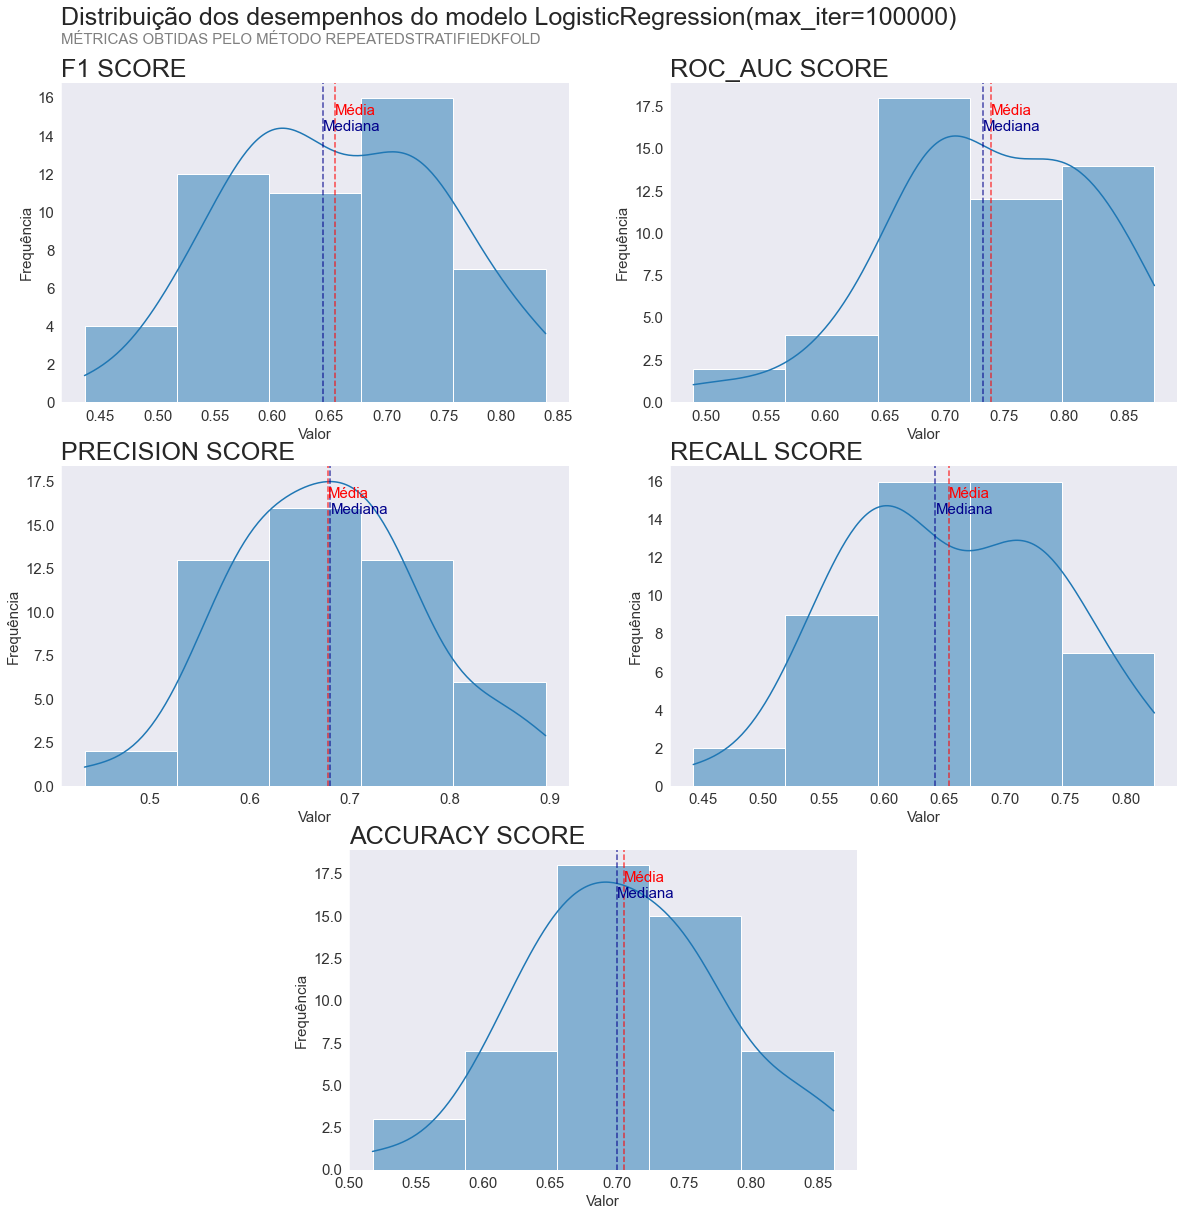

In [52]:
lr.hist_metrics(kde=True, bins=5)

Observando o histogramas das métricas calculadas a partir de uma regressão logística elas parecem se aproximar de uma distribuição normal, com a média e a mediana bem próximas, porém para confirmar tal afirmação vou utilizar a função normaltest do pacote scipy.stats, essa função testa a hipótese nula de que uma amostra vem de uma distribuição normal. É baseado no teste de D'Agostino e Pearson, que combina skewness e curtose para produzir um teste abrangente de normalidade.

### $H_0$ : As métricas obtidas em uma validação cruzada de um modelo de Regressão logística seguem distribuição normal
### $H_a$ : As métricas obtidas em uma validação cruzada de um modelo de Regressão logística não seguem distribuição normal

In [60]:
for metric, values in lr.scores.items():
    _, p_value = normaltest(values)
    print(f'Considerando a hipótese nula da métrica {metric} seguir uma distribuição normal foi encontrado um p_valor de {p_value}')

Considerando a hipótese nula da métrica f1 seguir uma distribuição normal foi encontrado um p_valor de 0.6227547056908027
Considerando a hipótese nula da métrica roc_auc seguir uma distribuição normal foi encontrado um p_valor de 0.2538810166455365
Considerando a hipótese nula da métrica precision seguir uma distribuição normal foi encontrado um p_valor de 0.8886138955767445
Considerando a hipótese nula da métrica recall seguir uma distribuição normal foi encontrado um p_valor de 0.5459507838153816
Considerando a hipótese nula da métrica accuracy seguir uma distribuição normal foi encontrado um p_valor de 0.9486973139771048


A partir do teste de normalidade não se obteve, em nenhuma das métricas, valores que rejeitassem a hipótese nula com um nível de significância de 5%, e por esta razão **não rejeitaremos a hipótese nula** de que as métricas seguem uma distribuição normal para uma regressão logística.

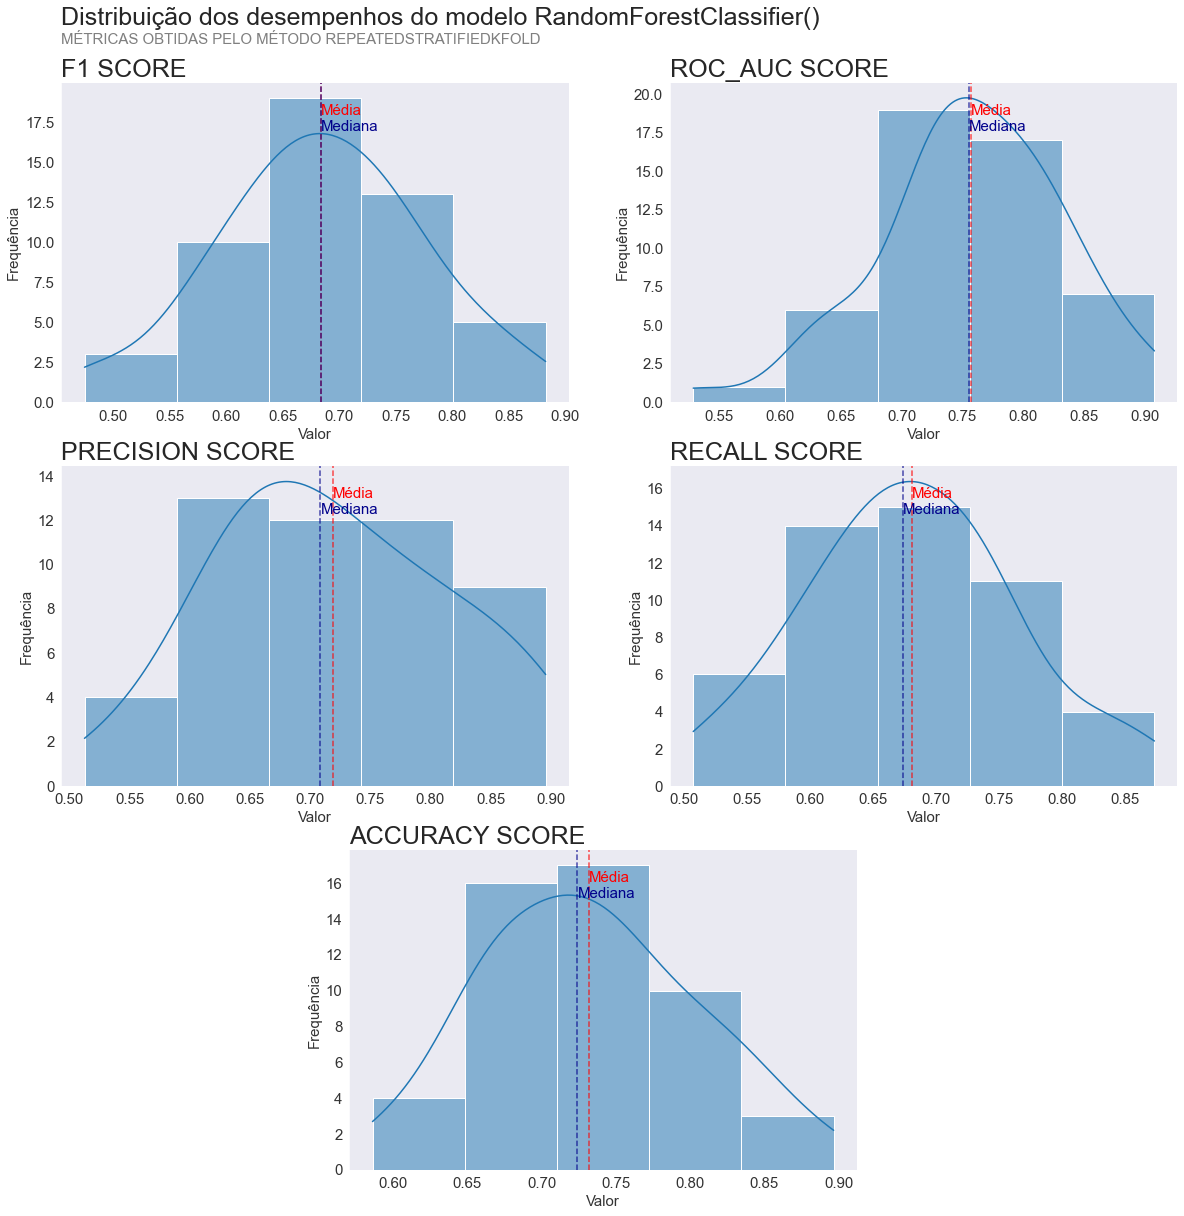

In [55]:
rf.hist_metrics(kde=True, bins=5)

### $H_0$ : As métricas obtidas em uma validação cruzada de um modelo de "RandomForestClassifier" seguem distribuição normal
### $H_a$ : As métricas obtidas em uma validação cruzada de um modelo de "RandomForestClassifier" não seguem distribuição normal

In [59]:
for metric, values in rf.scores.items():
    _, p_value = normaltest(values)
    print(f'Considerando a hipótese nula da métrica {metric} seguir uma distribuição foi encontrado um p_valor de {p_value}')

Considerando a hipótese nula da métrica f1 seguir uma distribuição foi encontrado um p_valor de 0.9492072861309454
Considerando a hipótese nula da métrica roc_auc seguir uma distribuição foi encontrado um p_valor de 0.17592393943419046
Considerando a hipótese nula da métrica precision seguir uma distribuição foi encontrado um p_valor de 0.37567251500020626
Considerando a hipótese nula da métrica recall seguir uma distribuição foi encontrado um p_valor de 0.8939388444140555
Considerando a hipótese nula da métrica accuracy seguir uma distribuição foi encontrado um p_valor de 0.6395199486461691


A partir do teste de normalidade não se obteve, em nenhuma das métricas, valores que rejeitassem a hipótese nula com um nível de significância de 5%, e por esta razão **não rejeitaremos a hipótese nula** de que as métricas seguem uma distribuição normal para um modelo "RandomForestClassifier".

# Seleção de variáveis(feature selection)

### LogisticRegression

In [32]:
lr2 = Classifier(LogisticRegression, df, [('feature_selection', chi2_drop())], max_iter=10000)
lr2.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=10000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [chi2_drop()]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.743             |ROC AUC MÉDIA         : 0.847
ROC AUC DESVIO PADRÃO : 0.088             |ROC AUC DESVIO PADRÃO : 0.008
ROC AUC ITERVALO      : 0.743 ± 0.024     |ROC AUC ITERVALO      : 0.847 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.712             |AC

In [33]:
lr3 = Classifier(LogisticRegression, df, [('feature_selection', high_corr_drop(0.95))], max_iter=10000)
lr3.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=10000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [high_corr_drop(threshold=None)]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.750             |ROC AUC MÉDIA         : 0.842
ROC AUC DESVIO PADRÃO : 0.085             |ROC AUC DESVIO PADRÃO : 0.007
ROC AUC ITERVALO      : 0.750 ± 0.024     |ROC AUC ITERVALO      : 0.842 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.

In [34]:
lr4 = Classifier(LogisticRegression, df, [('feature_selection', drop_equal_var_mean())], max_iter=10000)
lr4.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=10000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [drop_equal_var_mean()]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.773             |ROC AUC MÉDIA         : 0.827
ROC AUC DESVIO PADRÃO : 0.079             |ROC AUC DESVIO PADRÃO : 0.008
ROC AUC ITERVALO      : 0.773 ± 0.022     |ROC AUC ITERVALO      : 0.827 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.724      

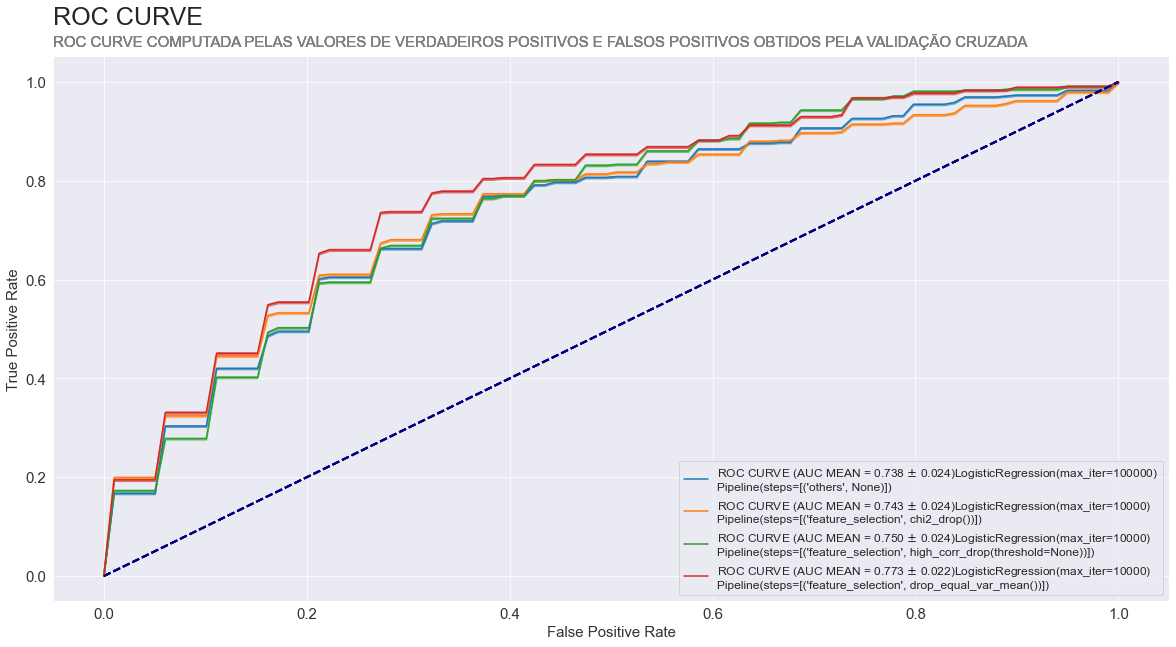

In [35]:
ax = lr.plot_roc_curve()
lr2.plot_roc_curve(ax=ax)
lr3.plot_roc_curve(ax=ax)
lr4.plot_roc_curve(ax=ax)
plt.show()

## RandomForestClassifier

In [36]:
rf = Classifier(RandomForestClassifier, df)
rf.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [None]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.757             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.076             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.757 ± 0.021     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.732             |ACCURACY  MÉDIA    

In [37]:
rf2 = Classifier(RandomForestClassifier, df, [('feature_selection', chi2_drop())])
rf2.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [chi2_drop()]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.765             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.082             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.765 ± 0.023     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.733             |ACCURACY  MÉ

In [38]:
rf3 = Classifier(RandomForestClassifier, df, [('feature_selection', high_corr_drop())])
rf3.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [high_corr_drop(threshold=None)]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.764             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.078             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.764 ± 0.021     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.708       

In [39]:
rf4 = Classifier(RandomForestClassifier, df, [('feature_selection', drop_equal_var_mean())])
rf4.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier()
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [drop_equal_var_mean()]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.773             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.082             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.773 ± 0.023     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.735             |AC

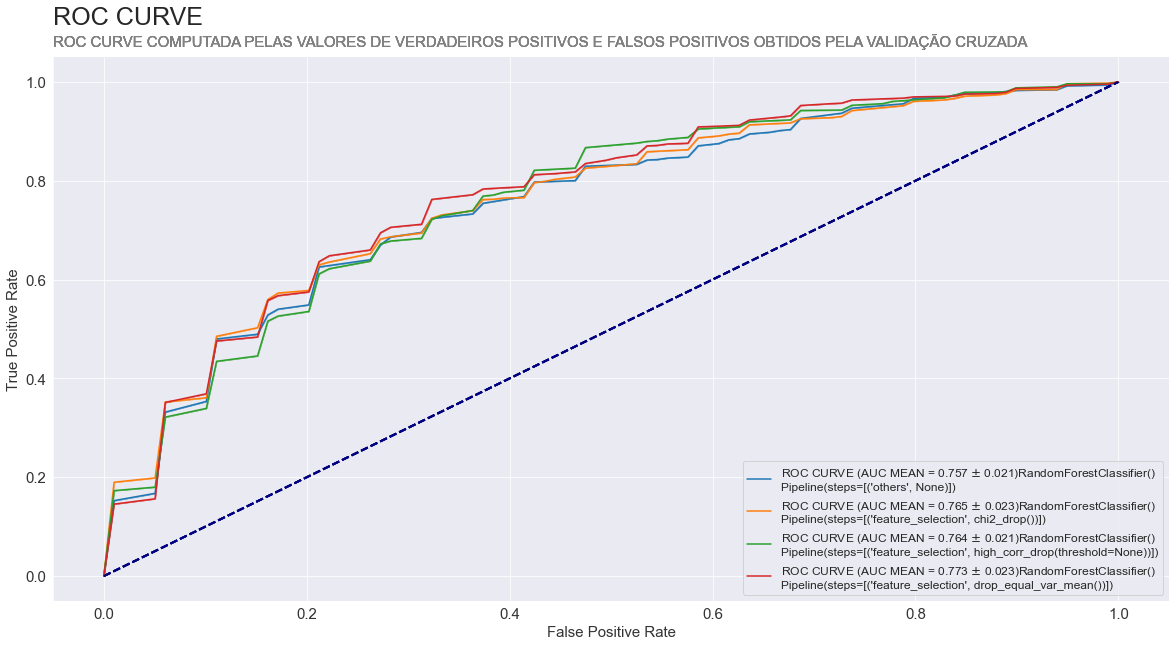

In [40]:
ax = rf.plot_roc_curve()
rf2.plot_roc_curve(ax=ax)
rf3.plot_roc_curve(ax=ax)
rf4.plot_roc_curve(ax=ax)
plt.show()

# Mudar o dataset original

In [62]:
corr_drop = high_corr_drop(0.99)
chi2 = chi2_drop()
deqvm = drop_equal_var_mean()

In [63]:
X = df.drop('ICU', axis=1)
y = df['ICU']

In [64]:
X = deqvm.fit_transform(X,y)

In [65]:
X.head()

,AGE_ABOVE65,GENDER,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,...,BLOODPRESSURE_DIASTOLIC_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,OXYGEN_SATURATION_MAX,UNDER_30,ABOVE_80
0,1,0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,...,0.086420,-0.285714,0.736842,0.237113,0.208791,0.898990,-0.247863,0.736842,0,0
1,0,0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-0.506173,0.357143,0.947368,-0.525773,0.604396,0.959596,-0.435897,1.000000,1,0
2,0,1,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,...,0.012346,-0.285714,0.684211,0.175258,0.208791,0.878788,-0.299145,0.684211,0,0
3,0,0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,...,0.333333,0.285714,0.868421,0.443299,0.538462,0.939394,-0.076923,0.894737,1,0
4,0,0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,...,-0.037037,-0.196429,0.815789,0.030928,0.252747,0.919192,-0.247863,0.842105,1,0


In [66]:
X = corr_drop.fit_transform(X,y)

In [67]:
X = chi2.fit_transform(X, y)

In [68]:
df = pd.concat([X,y], axis=1)

In [69]:
df.head()

,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GLUCOSE_MEDIAN,...,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,OXYGEN_SATURATION_MAX,UNDER_30,ABOVE_80,ICU
0,1,0.0,0.0,0.0,0.0,-0.317073,0.183673,-0.868365,-0.742004,-0.891993,...,0.736842,0.736842,0.237113,0.208791,0.898990,-0.247863,0.736842,0,0,1
1,0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.912243,-0.742004,-0.780261,...,0.935673,0.947368,-0.525773,0.604396,0.959596,-0.435897,1.000000,1,0,1
2,0,0.0,0.0,0.0,0.0,-0.317073,0.326531,-0.968861,-0.194030,-0.891993,...,0.684211,0.684211,0.175258,0.208791,0.878788,-0.299145,0.684211,0,0,0
3,0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.913659,-0.829424,-0.851024,...,0.868421,0.868421,0.443299,0.538462,0.939394,-0.076923,0.894737,1,0,0
4,0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.891012,-0.742004,-0.891993,...,0.815789,0.815789,0.030928,0.252747,0.919192,-0.247863,0.842105,1,0,0


# Otimização de hiperparâmetros

## LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_lr = {'C' : np.logspace(-4, 4, 20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=64541)
gscv = GridSearchCV(LogisticRegression(max_iter=1000), grid_lr, scoring='roc_auc', cv=cv)
gscv.fit(X, y)

In [ ]:
gscv.best_score_

## RandomForestClassifier

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(2, 50, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=64541)
gscv = GridSearchCV(RandomForestClassifier(), random_grid, scoring='roc_auc', cv=cv, verbose=1)
gscv.fit(X, y)
gscv.best_score_

### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lightgbm = Classifier(LGBMClassifier, df)
lightgbm.cross_val()

In [ ]:
grid_lgbm = {'learning_rate': [0.01], 'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
                   'objective': ['binary'], 'seed': [64541],
                   'colsample_bytree': [0.65, 0.75, 0.8], 
                   'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=64541)
gscv = GridSearchCV(LGBMClassifier(), grid_lgbm, scoring='roc_auc', cv=cv, verbose=1)
gscv.fit(X, y)
gscv.best_score_

# PyCaret 1582

In [72]:
pycaret_clf = setup(data = df,  
                    session_id = 1582,
                    target = 'ICU', 
                    feature_selection=True, 
                    fold_strategy=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=64541),
                    feature_interaction=True,
                    data_split_shuffle=True,
                    data_split_stratify=True)

,Description,Value
0,session_id,64541
1,Target,ICU
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(294, 33)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [73]:
top3_clf = compare_models(n_select = 3,sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7545,0.8297,0.6107,0.6868,0.6336,0.4528,0.4642,0.0150
nb,Naive Bayes,0.7572,0.8219,0.4521,0.7808,0.5533,0.4112,0.4483,0.0052
rf,Random Forest Classifier,0.7321,0.8125,0.5657,0.6650,0.5907,0.3982,0.4142,0.2462
gbc,Gradient Boosting Classifier,0.7253,0.8105,0.5671,0.6558,0.5896,0.3894,0.4043,0.0584
lr,Logistic Regression,0.7546,0.8000,0.5557,0.7178,0.6114,0.4393,0.4562,0.0110
et,Extra Trees Classifier,0.7134,0.7816,0.5375,0.6355,0.5609,0.3566,0.3726,0.2208
ada,Ada Boost Classifier,0.7172,0.7531,0.5643,0.6214,0.5770,0.3687,0.3792,0.0394
lda,Linear Discriminant Analysis,0.7343,0.7236,0.5582,0.6674,0.5932,0.4014,0.4130,0.0068
knn,K Neighbors Classifier,0.6958,0.7175,0.3393,0.6130,0.4183,0.2514,0.2748,0.0688
qda,Quadratic Discriminant Analysis,0.7173,0.6578,0.3543,0.7554,0.4577,0.3043,0.3532,0.0060


In [ ]:
lightgbm = tune_model(top3_clf[0], n_iter=1000, optimize='AUC')

In [ ]:
gbc = tune_model(top3_clf[1], n_iter=1000, optimize='AUC')

In [ ]:
ada = tune_model(top3_clf[2], n_iter=1000, optimize='AUC')